This file trains and tests the model with the data we just curated. The predictions will be plotted as bar plot to demonstrate the performance of the model.

In [1]:
import numpy as np
import pandas as pd
import Functions as myfun
import matplotlib.pyplot as plt
import os

In [2]:
#Enter the current study name here, all files created will be stored under this folder.
YourFolder = "A1AT"
###Note: You should already have the folder created, if not, go back to 1.Simulate_LP

In [3]:
#Load Data
train_lp = pd.read_excel('../Data/'+YourFolder+'/sim_CHOlp_trainx.xlsx',index_col=0)
test_lp = pd.read_excel('../Data/'+YourFolder+'/NEWlp_testx.xlsx',index_col=0)
train_gp = pd.read_excel('../Data/'+YourFolder+'/CHOgp_trainy.xlsx',index_col=0)
test_gp = pd.read_excel('../Data/'+YourFolder+'/NEWgp_testy.xlsx',index_col=0)
test_SIMlp = pd.read_excel('../Data/'+YourFolder+'/sim_NEWlp_testx.xlsx',index_col=0)

In [4]:
#Train and test the model

#Replace "YourLog" with the name you want to name the log folder
YourLog='A1At_log1'
random_seed = 8 #You may change this for a different model
###Uncomment the following to execute, make sure you change the log name to avoid overwrite! 
seeds_list = myfun.train_model_best(train_lp,test_lp,train_gp,test_gp,
                                    log_name=YourLog,nrepeat=10,test_SIMlp=test_SIMlp,
                                    record_all=True,ran_seed=random_seed) #10-15min


The LOG 'A1At_log1' already exists. Stopping the execution to avoid overwrite.


In [5]:
#Check model's performance
YourLog='A1AT_log1'
rmse,best_pred_df_raw,exp_gp_raw,best_SIMpred_df_raw = myfun.load_result_npz(YourLog,test_gp.copy(),record_all=True)
print('RMSE values for each replicate run are as following:',rmse)

RMSE values for each replicate run are as following: [0.13784706592559814 0.14459173381328583 0.07650090754032135
 0.07645650953054428 0.06973619014024734 0.07923641055822372
 0.05160320922732353 0.13784325122833252 0.07757945358753204
 0.07121118158102036]


In [6]:
#Denoise and renormalize the predictions 
thres = 0 #You can change this
best_pred_df = myfun.normalize(best_pred_df_raw,thres)
best_SIMpred_df = myfun.normalize(best_SIMpred_df_raw,thres)
exp_gp = myfun.normalize(exp_gp_raw,thres)

In [7]:
best_pred_df

,rhA1AT.1,rhA1AT.2,pdA1AT.1,pdA1AT.2,FetB.1,FetB.2,rhA1AT.1,rhA1AT.2,pdA1AT.1,pdA1AT.2,...,pdA1AT.1,pdA1AT.2,FetB.1,FetB.2,rhA1AT.1,rhA1AT.2,pdA1AT.1,pdA1AT.2,FetB.1,FetB.2
Ma6(Ma3)Mb4GNb4GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ma6(Ma2Ma3)Mb4GNb4GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ma6(GNb2Ma3)Mb4GNb4GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ma6(Ma3)Mb4GNb4(Fa6)GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ma6(Ab4GNb2Ma3)Mb4GNb4GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ab4GNb3Ab4GNb6(NNa3Ab4GNb2)Ma6(NNa3Ab4GNb4(NNa3Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NNa3Ab4GNb3Ab4GNb6(NNa3Ab4GNb2)Ma6(NNa3Ab4GNb4(NNa3Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NNa3Ab4GNb3Ab4GNb3Ab4GNb6(NNa3Ab4GNb2)Ma6(NNa3Ab4GNb4(NNa3Ab4GNb2)Ma3)Mb4GNb4GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NNa3Ab4GNb3Ab4GNb6(Ab4GNb3Ab4GNb2)Ma6(NNa3Ab4GNb4(NNa3Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Calculate average rmse for test_lp
#Too many same column names caused problems. Code below solve 

###Note: Code below may not be applicable to any situation. 
###Check 'compute_rmse' function description in Functions.py

pred_rhA1AT = best_pred_df.copy()
pred_rhA1AT = pred_rhA1AT.loc[:, pred_rhA1AT.columns.str.contains('rhA1AT', case=False)]
rhA1AT_rmse = myfun.compute_rmse(exp_gp['rhA1AT.1'],pred_rhA1AT)

pred_pdA1AT = best_pred_df.copy()
pred_pdA1AT = pred_pdA1AT.loc[:, pred_pdA1AT.columns.str.contains('pdA1AT', case=False)]
pdA1AT_rmse = myfun.compute_rmse(exp_gp['pdA1AT.1'],pred_pdA1AT)


print('RMSE for rhA1AT, pdA1AT predictions using expreiment data:')
print(rhA1AT_rmse,pdA1AT_rmse)

#Calculate average rmse for test_SIMlp
pred_rhA1AT = best_SIMpred_df.copy()
pred_rhA1AT = pred_rhA1AT.loc[:, pred_rhA1AT.columns.str.contains('rhA1AT', case=False)]
rhA1AT_rmse = myfun.compute_rmse(exp_gp['rhA1AT.1'],pred_rhA1AT)

pred_pdA1AT = best_SIMpred_df.copy()
pred_pdA1AT = pred_pdA1AT.loc[:, pred_pdA1AT.columns.str.contains('pdA1AT', case=False)]
pdA1AT_rmse = myfun.compute_rmse(exp_gp['pdA1AT.1'],pred_pdA1AT)

print('RMSE for rhA1AT, pdA1AT predictions using simulated data:')
print(rhA1AT_rmse,pdA1AT_rmse)


RMSE for rhA1AT, pdA1AT predictions using expreiment data:
0.06834444716371334 0.05606046419559887
RMSE for rhA1AT, pdA1AT predictions using simulated data:
0.05605571161734084 0.07114974978269689


In [9]:
#Plot the predictions aganist the answer.

plot_thres = 0.02 #You can change this, no effect if smaller than 'thres'

['Ma6(GNb2Ma3)Mb4GNb4GN' 'GNb2Ma6(GNb2Ma3)Mb4GNb4GN'
 'GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN'
 'NNa6Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN' 'Ma6(Ab4GNb2Ma3)Mb4GNb4(Fa6)GN'
 'Ab4GNb6(Ab4GNb2)Ma6(Ab4GNb4(Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN']
        data standard_error
                       mean
0   Observed   7.951867e-18
1  Predicted   7.512214e-02


/Users/hainingli/Library/CloudStorage/GoogleDrive-kikiliof1998@gmail.com/My Drive/UCSD/PhD/Glyco-seq/AllOverAgain2024/Code/Functions.py:495: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(data=test, x='glycan', y='abundance', hue='data', err_kws={'linewidth': 0.3}, palette=color)


Plotted glycan names print out above


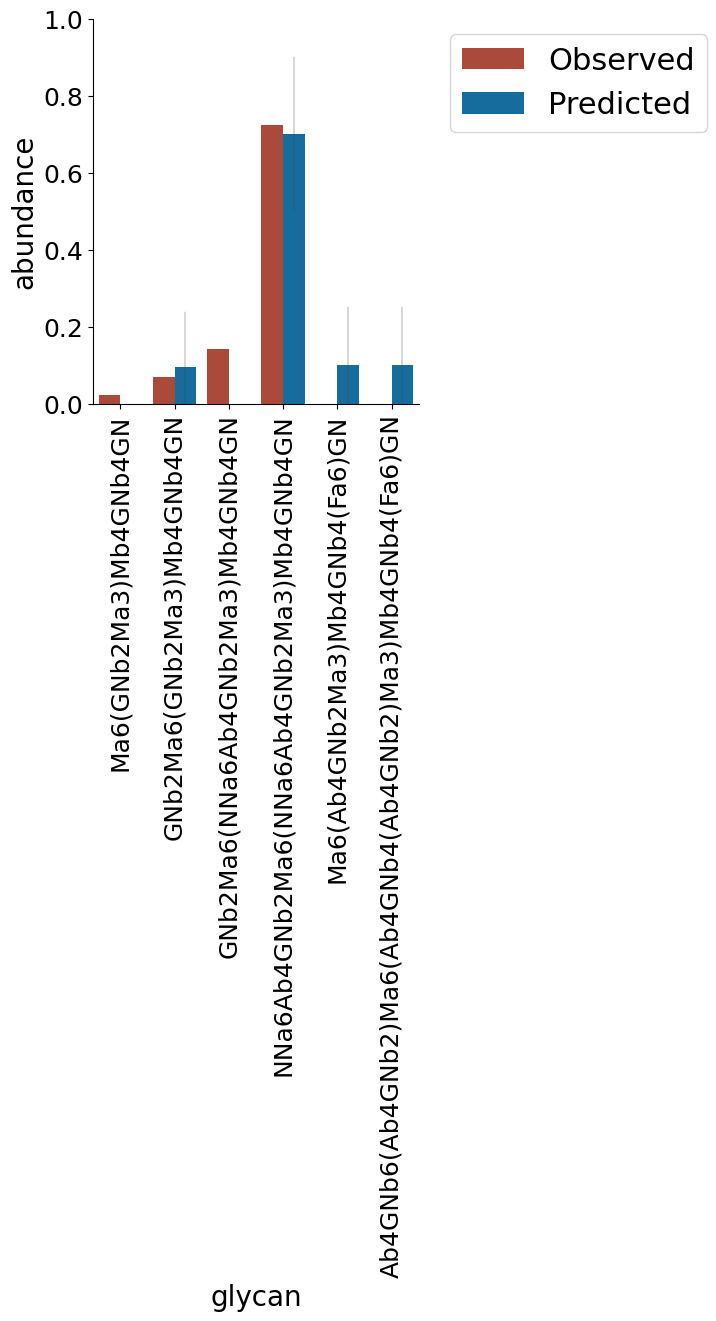

In [10]:
#Plot the predicted glycoprofile vs measured glycoprofile for rhA1AT
rhA1AT_all_melt = myfun.melt_for_plot([best_pred_df.copy()], # , best_SIMpred_df.copy()
                                exp_gp.iloc[:,:2].copy(),
                                ['Predicted']) #,'predGP w/ simLP'
# fetb_all_melt.to_excel('../Data/'+YourFolder+'/SourceData/Prediction_FetB.xlsx',index = True)
myfun.plot_glycoprofile(rhA1AT_all_melt.copy(), threshold = plot_thres,
                        legend_loc='upper left',
                        color=['#BC3C29', '#0072B5', '#E18727'],
                        ylimit=1,
                        filename=YourFolder+'/Prediction_rhA1AT.1')
print("Plotted glycan names print out above")

['NNa6Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN'
 'NNa6Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4(Fa6)GN'
 'NNa6Ab4GNb4(NNa6Ab4GNb2)Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN'
 'NNa6Ab4GNb2Ma6(NNa6Ab4GNb4(NNa6Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN'
 'Ma6(GNb2Ma3)Mb4GNb4GN' 'Ma6(Ab4GNb2Ma3)Mb4GNb4(Fa6)GN'
 'Ab4GNb6(Ab4GNb2)Ma6(Ab4GNb4(Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN']
        data standard_error
                       mean
0   Observed   1.357636e-18
1  Predicted   7.385018e-02


/Users/hainingli/Library/CloudStorage/GoogleDrive-kikiliof1998@gmail.com/My Drive/UCSD/PhD/Glyco-seq/AllOverAgain2024/Code/Functions.py:495: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(data=test, x='glycan', y='abundance', hue='data', err_kws={'linewidth': 0.3}, palette=color)


Plotted glycan names print out above


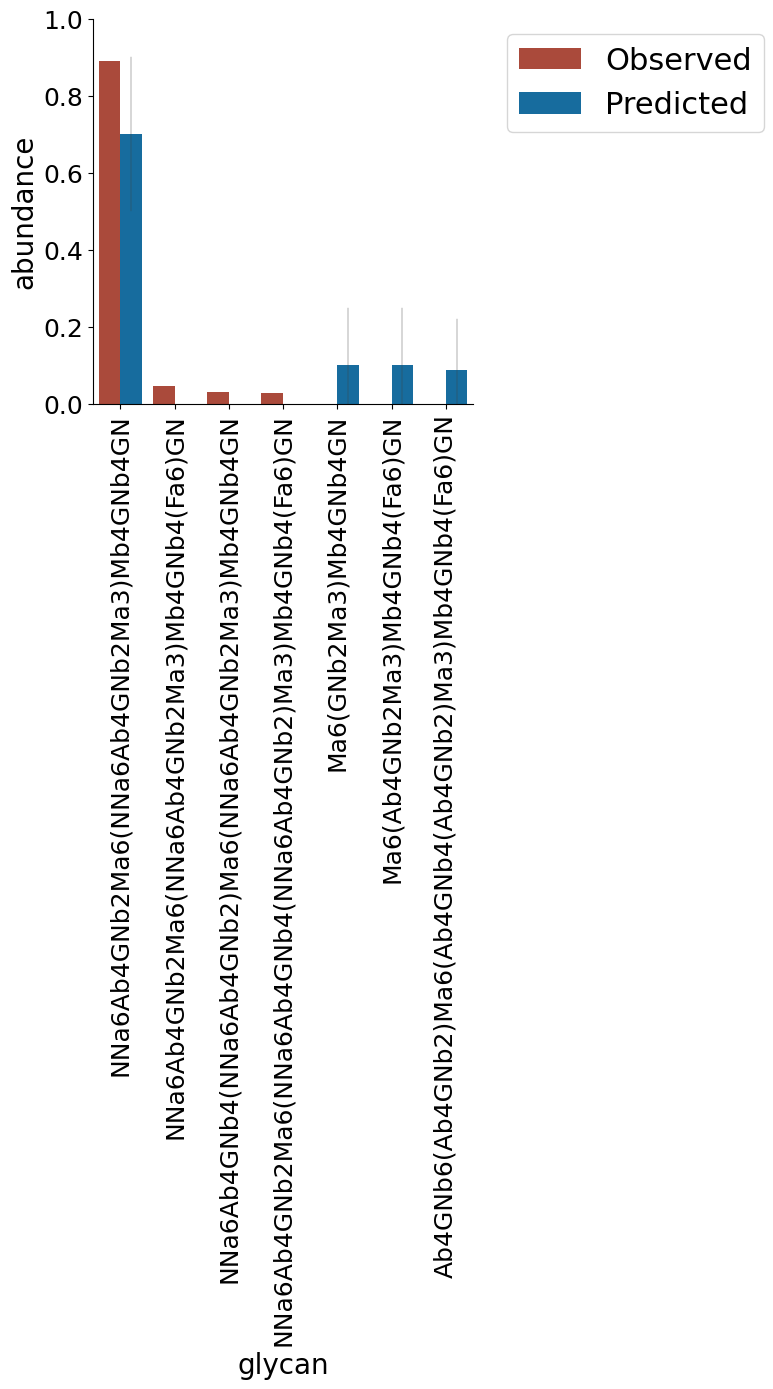

In [11]:
#Plot the predicted glycoprofile vs measured glycoprofile for pdA1AT
pdA1AT_all_melt = myfun.melt_for_plot([best_pred_df.copy()], #, best_SIMpred_df.copy()
                                exp_gp.iloc[:,2:4].copy(),
                                ['Predicted']) #,'predGP w/ simLP'
# fetb_all_melt.to_excel('../Data/'+YourFolder+'/SourceData/Prediction_FetB.xlsx',index = True)
myfun.plot_glycoprofile(pdA1AT_all_melt.copy(), threshold = plot_thres,
                        legend_loc='upper left',
                        color=['#BC3C29', '#0072B5', '#E18727'],
                        ylimit=1,
                        filename=YourFolder+'/Prediction_pdA1AT.1')
print("Plotted glycan names print out above")